### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
# Loead trained and test data
train_data = np.load('simu_20000_0.1_90_140_train.npy')
test_data = np.load('simu_10000_0.1_141_178_test.npy')

print("The shape of trained data is: ",train_data.shape)
print("The shape of tested data is: ",test_data.shape)  

The shape of trained data is:  (20000, 1006)
The shape of tested data is:  (10000, 1006)


- In the data file, each row includes sensor data (10 seconds * 100Hz) + ID + Time + H + R + S + D 
- H, R, S and D are heartrate, respiratory rate, systolic and diastolic blood pressure

In [11]:
train_data[0]

array([-2.45845714e-07, -2.06162897e-07,  1.56348382e-06, ...,
        1.90000000e+01,  9.10000000e+01,  9.50000000e+01])

- Split dataset into train and test datasets and separating the labels from the features

In [43]:


X_train_data = train_data[:,0:1000]
y_train_data_systolic = train_data[:,-2]
y_train_data_diastolic = train_data[:,-1]

X_test_data = test_data[:,0:1000]
y_test_data_systolic = test_data[:,-2]
y_test_data_diastolic = test_data[:,-1]

# verify the shape of the data
print("The shape of X_train_data is: ",X_train_data.shape)
print("The shape of y_train_data_systolic is: ",y_train_data_systolic.shape)    
print("The shape of y_train_data_diastolic is: ",y_train_data_diastolic.shape)
print("The shape of X_test_data is: ",X_test_data.shape)
print("The shape of y_test_data_systolic is: ",y_test_data_systolic.shape)
print("The shape of y_test_data_diastolic is: ",y_test_data_diastolic.shape)    


The shape of X_train_data is:  (20000, 1000)
The shape of y_train_data_systolic is:  (20000,)
The shape of y_train_data_diastolic is:  (20000,)
The shape of X_test_data is:  (10000, 1000)
The shape of y_test_data_systolic is:  (10000,)
The shape of y_test_data_diastolic is:  (10000,)


In [15]:
print(type(train_data))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'The data distribution of the training data')

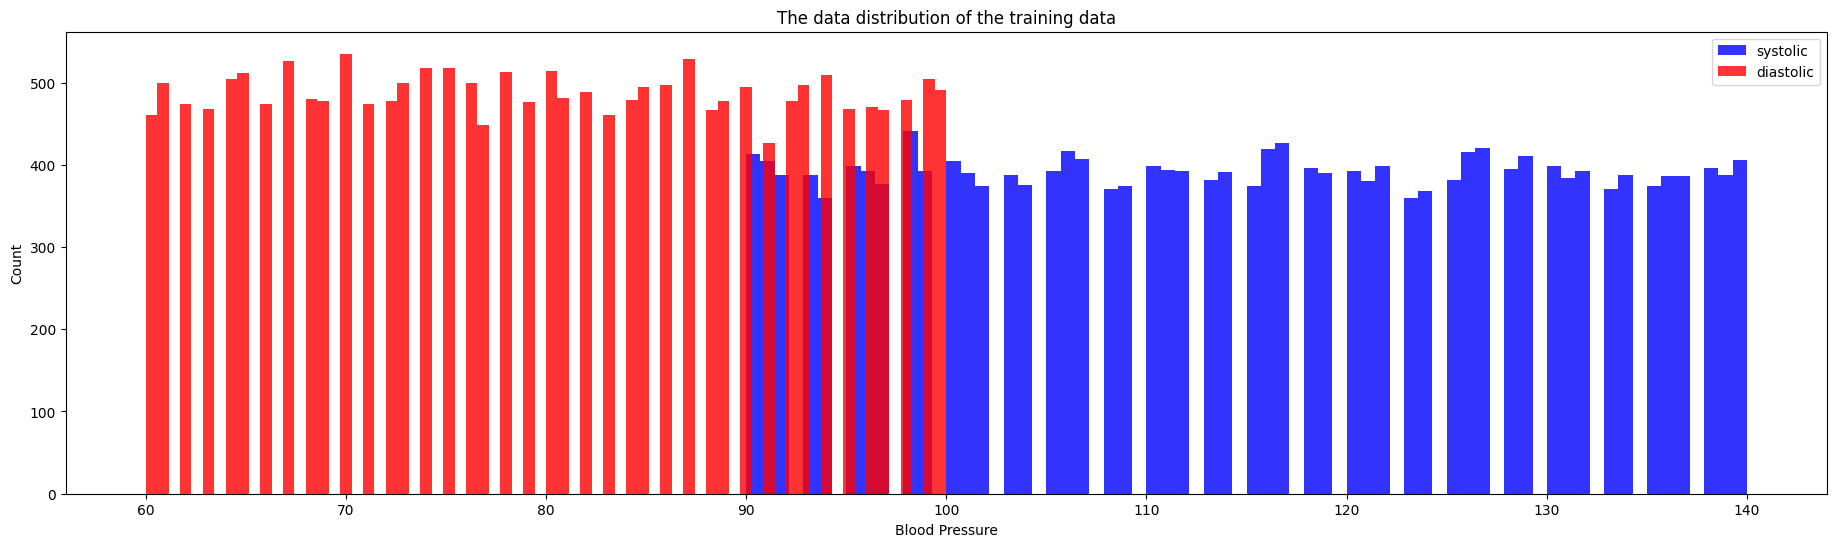

In [59]:
# Analyze the data distribution, normalizaiton and standardization 
# The data distribution of the training data
plt.figure(figsize=(50, 6))
plt.subplot(1,2,1)
plt.hist(y_train_data_systolic, bins=70, color='blue', alpha = 0.8, label='systolic')
plt.hist(y_train_data_diastolic, bins=70, color='red', alpha = 0.8,  label='diastolic')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.legend()
plt.title('The data distribution of the training data')


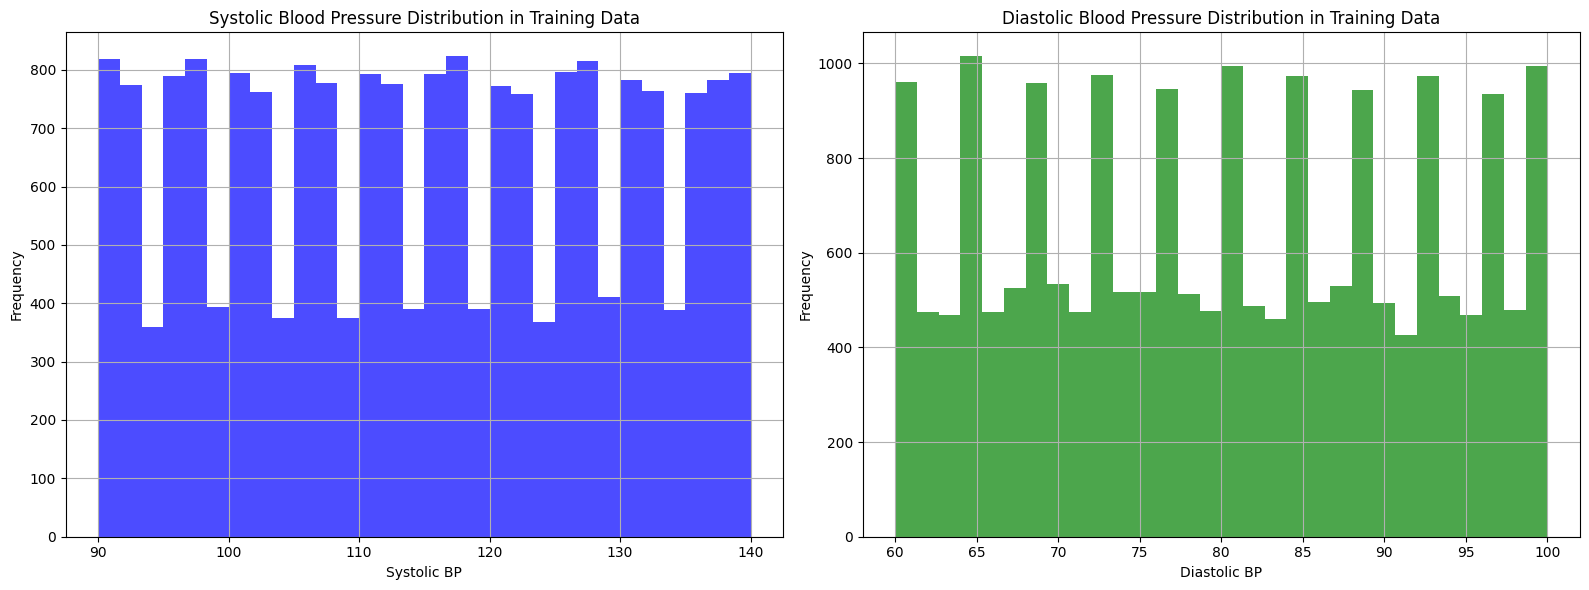

In [61]:
plt.figure(figsize=(16, 6))

# Systolic Blood Pressure Distribution in Training Data
plt.subplot(1, 2, 1)
plt.hist(y_train_data_systolic, bins=30, color='blue', alpha=0.7, label='Systolic BP')
plt.title('Systolic Blood Pressure Distribution in Training Data')
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.grid(True)

# Diastolic Blood Pressure Distribution in Training Data
plt.subplot(1, 2, 2)
plt.hist(y_train_data_diastolic, bins=30, color='green', alpha=0.7, label='Diastolic BP')
plt.title('Diastolic Blood Pressure Distribution in Training Data')
plt.xlabel('Diastolic BP')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

- Create a pairplot to visualize the relationship between Systolic and Diastolic BP

In [62]:
# pair plot using sns library
sns.pairplot(pd.DataFrame(X_train_data))
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000185765AC0E0> (for post_execute):


ValueError: Image size of 250000x250000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 250000x250000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 250000x250000 with 1488 Axes>

In [52]:
# Check bar plot
# y_train_data_systolic_bar = np.unique(y_train_data_systolic, return_counts=True)
# y_train_data_diastolic_bar = np.unique(y_train_data_diastolic, return_counts=True)

y_train_data_systolic.value_counts().plot.bar()



AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [49]:
sns.countplot(x=y_train_data_systolic, data=y_test_data_diastolic, palette="Greens_d")

AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [31]:
my_array = np.array([[1, 2, 3, 4, 5], [6,7,8,9,10]])
my_array1 = np.arange(1, 6)
my_array2 = np.arange(6)

In [25]:
print(my_array)
print(my_array1)
print(my_array2)
print(type(my_array1))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[1 2 3 4 5]
[0 1 2 3 4 5]
<class 'numpy.ndarray'>


In [28]:
print(my_array.shape)

(2, 5)


In [33]:
my_array.reshape((5,2))
print(my_array)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [29]:
from_list = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int8)
array_2d = np.array((np.arange(0,8,2), np.arange(1,8,2)))

print(array_2d)

[[0 2 4 6]
 [1 3 5 7]]


In [32]:
print("2D shape: ", array_2d.shape)
print("1D shape: ", my_array.shape)

2D shape:  (2, 4)
1D shape:  (2, 5)


In [36]:
array_2d = array_2d.reshape((4,2))
print(array_2d)

[[0 2]
 [4 6]
 [1 3]
 [5 7]]


In [42]:
array_2d[:, -1]

array([2, 6, 3, 7])